In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
user_data=pd.read_csv('cleaned_userdata.csv')
user_data.head()

,Unnamed: 0,Unnamed: 0.1,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,1,10,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816
1,3,15,vUzJAyFEudsnkWwfcLIKT5mJAV+uVRTW2uajCrghFwI=,13,20,male,3,20140410,20170427
2,6,28,ox62m0QICnrFa8/ZM5jJ5WBidWIieREUjUdCiWExLSU=,6,26,female,7,20140118,20170917
3,7,29,95tnnY+Zq8f4jpk5SaDWcmnngD9dFe/OwxAqhss6T8k=,4,25,female,3,20150624,20150701
4,8,30,Der2/cdVesg2+u1UZX/u11dZBM/FWtNl1TlKIK82puw=,11,21,female,9,20140817,20171231


In [3]:
songs=pd.read_csv('cleaned_music_metadata.csv')
songs.head()

,Unnamed: 0,0,1,2,3,4,5
0,+dOlHQGlsiHPbG1cMYsoFVsAi05YgsGfeEzsdS16yec=,368441,['1609'],['Marvin Gaye & Kygo'],"['Marvin Gaye', ' Odell Brown', ' David Ritz']","['Marvin Gaye', ' Odell Brown', ' David Ritz']",-1.0
1,NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=,262749,['139'],['John Legend'],['John Stephens'],['John Stephens'],52.0
2,igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=,228717,['465'],['Urban Zakapa'],"['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...","['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...",31.0
3,UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=,222649,['1609'],['Calvin Harris'],['Calvin Harris'],['Calvin Harris'],52.0
4,nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=,227327,['880'],['Casting Crowns'],"['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...","['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...",52.0


In [36]:
#Reading test.csv
test=pd.read_csv('test.csv')
test.dropna()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
5,5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,radio,Radio,radio
...,...,...,...,...,...,...
2556781,2556781,J6U8R16TeYWhrnl/riJeqc7scOwhoBeYz5+3O7ao1mE=,J0L32tjJ+S9PtXac0SDvLe9wfyUxR7lSPGIBBt0KX+s=,discover,Online playlist more,online-playlist
2556782,2556782,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,DLewxl82pFT6+OgSpGYmN26IayVLtcv2eiJEJBSIWLI=,discover,Online playlist more,online-playlist
2556783,2556783,k87exEzK9b71OyGFQkvMTUFW6ue+j321CsMbwpz3o/w=,A1A04ZUa5dvkPMcPmoHkPD5apjQM3KBhVlcL/SR3S7Q=,my library,Local playlist more,local-playlist
2556784,2556784,XmA/cIkXJ8jZUfsUc4bBfJVWMMqmylnPW0WVkg/iz0s=,HGROX/ydkner7ykeMTZjh5oW/b0DbHb0awQIqRNBHIc=,discover,Online playlist more,online-playlist


In [37]:
#Removing the data cooresponding to the users that we filtered away from user data
idx=[]
for i in range(test.msno.size):
    if test.msno[i] not in user_data.msno.tolist():
        idx.append(i)
test=test.drop(idx)
        

In [42]:
test.to_csv("cleaned_test_foruser.csv")

In [44]:
test_cal=test.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
test_cal.head()

,id,msno,song_id
24,24,NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=,YPQayJU1Xtwo9RZ8ou798V/i6JGkrgVPrpPMyXnoBoE=
25,25,NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=,PrRUipjN6anAeZNOgxqq7hyHBhd4tXIziE9A2bvprCA=
26,26,NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=,UqSNAiAmq/W3WsodEfSgcfQWe5lWAvj4zyD7CXIDpIg=
27,27,NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=,XCnqc4r5J4+qZLPH1zOHq5QnyR4oH0/0/mWH1dErf9Y=
28,28,NMjW8qxMk/ojwFH12PXQmwEsP48/c3rLi7MWU2QHa7k=,8J8Ybj0twL5V+fOtdNEtRo9oc2S2kLxG+AspQZLtxbw=


In [131]:
popularity=test_cal.groupby('song_id').count()
popularity.sort_values(by=['msno'], inplace=True, ascending=False)
popularsubset5000=popularity[0:5000]

In [133]:
popularsongs=popularsubset5000.index.tolist()
len(popularsongs)


5000

In [217]:
dataframe=pd.read_csv('cleaned_music_metadata.csv')
idx=[]
for i in range(dataframe['2'].size):
    if dataframe['Unnamed: 0'][i] not in popularsongs:
        idx.append(i)
dataframe=dataframe.drop(idx)
artistlist=dataframe['3']
b=[]
for i,j in enumerate(artistlist):
    x=j[1:-1].split(', ')
    b.insert(i,x)
blist = [item for sublist in b for item in sublist]
bist=np.unique(np.array(blist))
print(len(bist))


392


In [212]:
artists=songs['2']
alist=[]
for artist in artists:
    a= artist[1:-1].split(',')
    alist.append(a)
#np.unique(np.array(alist))
#len(np.unique(np.array(alist)))
#print(len(np.unique(np.array(artistlists))))
#np.array(artistlists)


In [205]:
a=[]
artistlist=songs['2']
for i,j in enumerate(artistlist):
    j=j[1:-1]
    x=j.split(',')
    a.insert(i,x)
alist = [item for sublist in a for item in sublist]
b=np.unique(np.array(alist))
print(len(b))

12204


count     97040.000000
mean     231096.609676
std       41822.597708
min      149300.000000
25%      200234.000000
50%      228006.000000
75%      259317.000000
max      331788.000000
Name: 0, dtype: float64

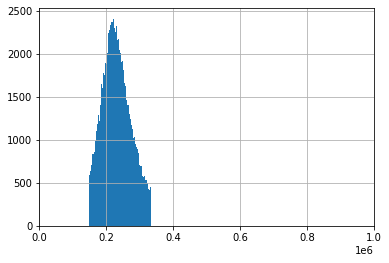

In [192]:
songlength=songs['0']
p=songlength.hist(bins='auto')
p.set_xlim([0,10**6])
songlength.describe()

In [193]:
idx=[]
songlength=songs['0']
for i in enumerate(songlength):
    if (i[1]<149282 or i[1]>331810):
        idx.append(i[0])
songs=songs.drop(idx)
songs.head()

,Unnamed: 0,0,1,2,3,4,5
1,NV9HhUzyK50tGvxb3w0PdZoaw3Ypp86XDmmMr0vgFdg=,262749,['139'],['John Legend'],['John Stephens'],['John Stephens'],52.0
2,igUq5ErBzlm2Wi05YsoiyWdxd4wbHGPaFOS8kQFhoik=,228717,['465'],['Urban Zakapa'],"['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...","['Gwon Soonil', ' Park Yongin', ' Choi JaeMan'...",31.0
3,UfK2UdQAaYF6IJUXqSJ10FsbAF3YkvMJYcTYC2Ec5m4=,222649,['1609'],['Calvin Harris'],['Calvin Harris'],['Calvin Harris'],52.0
4,nO+tjL6/qHgNO/ui0TjeP+nSsD+aoGcT9AHU7Dtrzsc=,227327,['880'],['Casting Crowns'],"['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...","['Mark Hall', 'Matt Maher', 'John Mabe', 'Blak...",52.0
5,ZxB4Y6OFY7oArWVqRWofM3g714CWrHbY4ohABjzGLFE=,256052,['1609'],['Robin Schulz'],"['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...","['Dennis Bierbrodt', ' Guido Kramer', ' Robin ...",52.0
...,...,...,...,...,...,...,...
117825,rqJDTmkXCjVbfJX1v1Q41+fVpCnTrj1krmNrxdyw7+M=,167950,['465'],['Dennis Wilson'],"['Dan Wilson', ' C. Wilson', ' S. Kalanich']","['Dan Wilson', ' C. Wilson', ' S. Kalanich']",52.0
117826,gmAdLUfMLPrO09ZV4e98xUbgkay1KvhC+vOjUKXNOJM=,192261,['465'],['Grand Avenue'],['Rasmus Walter Hansen'],['Rasmus Walter Hansen'],52.0
117829,bnGpjDLeYdLPPLVSaJkY/r3IYwbasruKy48iSLgTois=,174706,['444'],['Lee Mija/Ha Chunhwa'],['Go Bongsan'],['Lee Yongil'],31.0
117830,9w0/At83TBWVHIMHJsLWc4XkSt6rtQWrhgPS5VkDGBw=,167481,['1011'],['Kenny Chesney'],"['Rodney Clawson', ' Vicky McGehee', ' David L...","['Rodney Clawson', ' Vicky McGehee', ' David L...",52.0
